In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
# view the dataset
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# Create Dataframe with all columns
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# lets do scaling for petal lenght and width cols using MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [16]:
scaler.fit(df[['petal length (cm)']])
df[['petal length (cm)']]=scaler.transform(df[['petal length (cm)']])

In [17]:
scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']]=scaler.transform(df[['petal width (cm)']])

In [18]:
# Displaying the Dataframe after scaling of the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667


# Elbow Plot 

In [44]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    # using fit() and transform function
    km.fit(df[['petal length (cm)','petal width (cm)']])
    df[['petal width (cm)']]=scaler.transform(df[['petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\91934\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


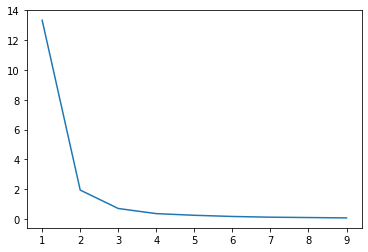

In [22]:
plt.plot(k_rng,sse)

# from the elbow plot we got the bending point at 2 


In [25]:
# let cluster(k=2)
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
df['cluster']=y_pred

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,0.067797,-0.071429,0
1,4.9,3.0,0.067797,-0.071429,0
2,4.7,3.2,0.050847,-0.071429,0
3,4.6,3.1,0.084746,-0.071429,0
4,5.0,3.6,0.067797,-0.071429,0


In [34]:
# find the cluster centers
km.cluster_centers_

array([[ 0.07830508, -0.07142855],
       [ 0.78445099, -0.07142845],
       [ 0.55775267, -0.07142849]])

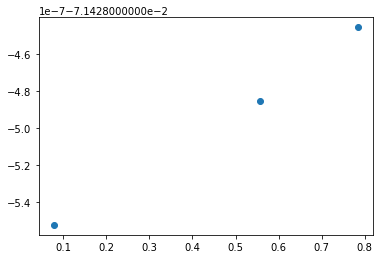

In [36]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [35]:
# As we have 3 clusters 
# So we need to divide the clusters into 3 categories
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


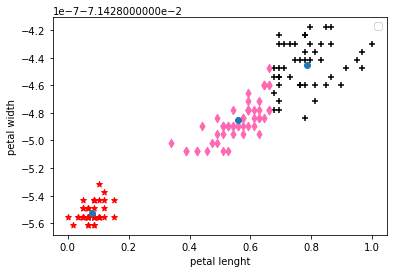

In [42]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='*')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black',marker='+')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='hotpink',marker='d')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend()